# Assignment 2 - DAT405

Keywords: Linear Regression (model and plot), Residual plot, Iris data set, Train/test data split, Logistic Regression, accuracy score, confusion matrix, KNN Classifier, Listed Color Map

## Task 1

In [ ]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
df = pd.read_excel('house_prices.xlsx')
x = pd.DataFrame(df, columns = ['Area (m^2)'])
y = pd.DataFrame(df, columns = ['Price (MSEK)'])

In [ ]:
df.plot.scatter(x='Area (m^2)', y='Price (MSEK)')
plt.show()

In [ ]:
#Generating a linear regression model, which is a line in this case
model = LinearRegression().fit(x, y)

In [ ]:
#Slope of the line:
model.coef_

In [ ]:
#Intercept of the line:
model.intercept_

In [ ]:
#Predicting a new (or an old) value:
model.predict([[100]])

In [ ]:
model.predict([[150]])

In [ ]:
model.predict([[200]])

In [ ]:
#Plotting the regresion line
xfit = np.linspace(0, 220, 1000) #1000 evenly spaced points in [0, 55].
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit)
plt.show()

In [ ]:
# Plot the residuals after fitting a linear model
sns.residplot(x=x, y=y, lowess=True, color="g")

## Task 2

In [6]:
#Get access to the iris data set
from sklearn import datasets

iris = datasets.load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

Split dataset into training set (70%) and test set (30%).

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=0)

**Step 1.** Import the logistic regression model.

In [8]:
from sklearn.linear_model import LogisticRegression

**Step 2.** Make an instance of the Model (with multiclass option "one-versus-the-rest" and a solver called liblinear) 

In [9]:
logisticRegr = LogisticRegression(multi_class='ovr', solver='liblinear')

**Step 3.** Train the model on the data, storing the information learned from the data

In [10]:
logisticRegr.fit(x_train, y_train)

LogisticRegression(multi_class='ovr', solver='liblinear')

**Step 4.** Predict the labels of new data

In [11]:
# Predict for Multiple Observations (images) at Once
logisticRegr.predict(x_test[0:12])

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1])

In [12]:
# Make predictions on entire test data
predictions = logisticRegr.predict(x_test)

### Measuring Accuracy

We are going to see how the model performs on the new data (test set). Recall that accuracy = correct predictions / total number of data points.

In [13]:
# Use the score method to get the accuracy of model
score = logisticRegr.score(x_test, y_test)
print(score)

0.8888888888888888


### Plotting a Confusion Matrix 

A confusion matrix is a table that describes the performance of a classifier on a set of test data for which the true values are known.

In [14]:
import numpy as np 
import seaborn as sns #seaborn is a package for nice-looking graphics
from sklearn import metrics

In [15]:
cm = metrics.confusion_matrix(y_test, predictions)

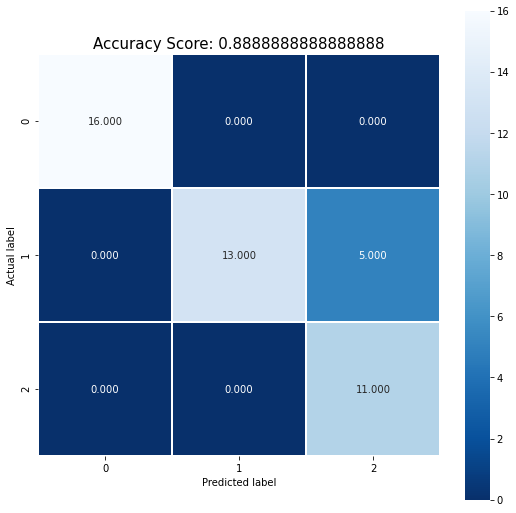

In [16]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);
plt.savefig('toy_Digits_ConfusionSeabornCodementor.png')
#plt.show();

## Task 3

In [17]:
#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

### Running the classifier

In [122]:
#Create KNN Classifier
n_neighbors=25 #k=1,3,21
knn = KNeighborsClassifier(n_neighbors,weights='distance') 

#Train the model using the training sets
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=25, weights='distance')

### Evaluating the classifier by accuracy score and confusion matrix

In [123]:
#Predict the response for test dataset
y_pred = knn.predict(x_test)

In [124]:
# Model Accuracy, how often is the classifier correct?
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9777777777777777


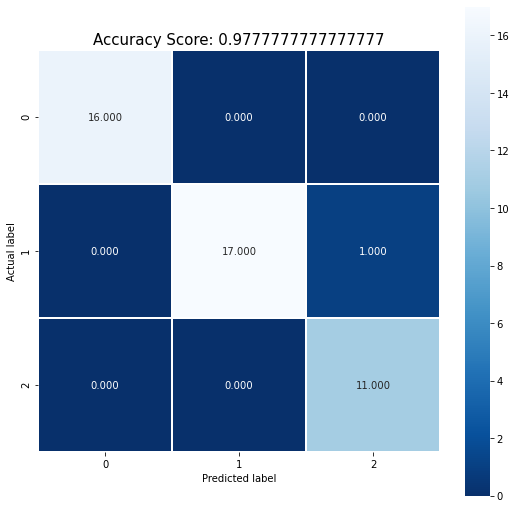

In [125]:
cm = metrics.confusion_matrix(y_test, y_pred)

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(accuracy)
plt.title(all_sample_title, size = 15);
plt.savefig('toy_Digits_ConfusionSeabornCodementor.png')
#plt.show();

## Plotting the result in a Listed color map

In [139]:
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

In [140]:
X = iris.data[:, :2]
y = iris.target

In [141]:
h = .02

In [142]:
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue'])

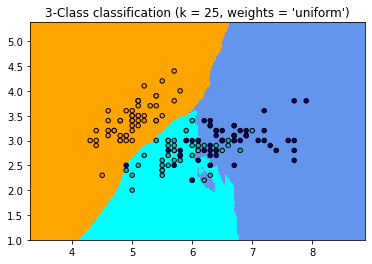

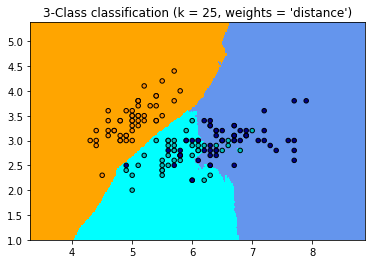

In [143]:
for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

plt.show()